In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os.path
import os

from pathlib import Path # to get the home directory
home_dir = str(Path.home())

% matplotlib inline

# Definition of tube class

In [2]:
class tube:
    x = np.zeros((0,3))
    def __init__(self, coordinates):
        for node in coordinates:
            node = node.split(',')
            if (len(node) is 3):
                a = np.array([float(item) for item in node])
                a = a.reshape((1,3))
                self.x = np.concatenate((self.x, a), axis=0)
    
    def avg_y(self):
        return np.mean(self.x[:,1])

# Check height of tubes

In [3]:
directory = os.path.join(home_dir,"research/cnt_mesh_20_nm_bids_1.5_thick")

tubes = []

for i in range(1,100):
    filename = os.path.join(directory, "tube"+str(i)+".dat")
    if (not os.path.isfile(filename)):
        continue
    print("reading file: {}".format(filename))
    with open(filename) as file:
        for line in file:
            x = line.strip().split(";")
            x = x[1:]
            tubes.append(tube(x))

# make sure the last tube is stored and read properly
if (tubes[-1].x.shape!=tubes[0].x.shape): tubes.pop(-1)
            
print("number of tubes: {}".format(len(tubes)))
avg_y = np.array([np.mean(tube.x[:,1]) for tube in tubes[:]])

reading file: /home/amirhossein/research/cnt_mesh_20_nm_bids_1.5_thick/tube1.dat
number of tubes: 1210


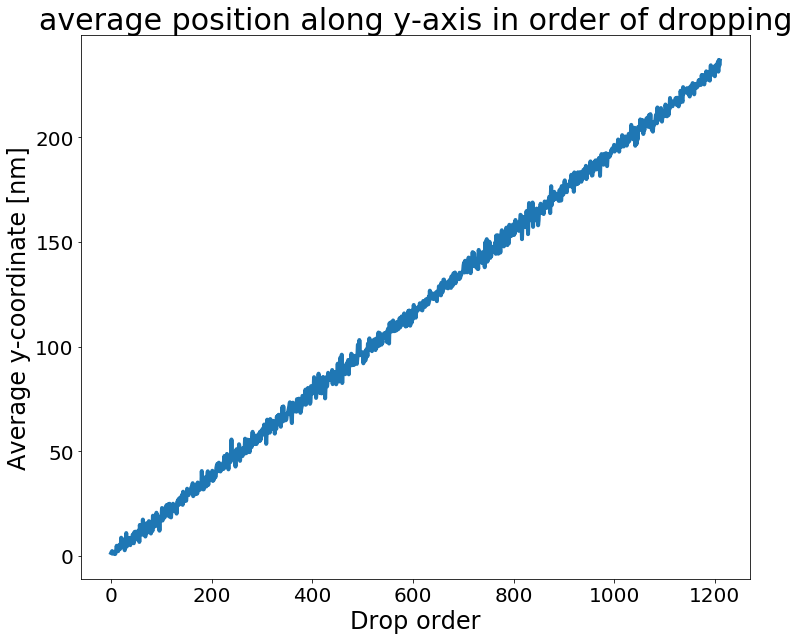

In [4]:
min_order, max_order = 0, len(tubes)
drop_order = np.linspace(min_order,max_order, max_order-min_order)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.plot(drop_order,avg_y[min_order:max_order], linewidth=4)
ax.set_title("average position along y-axis in order of dropping",fontsize=30)
ax.set_xlabel("Drop order",fontsize=24)
ax.set_ylabel("Average y-coordinate [nm]",fontsize=24)
ax.tick_params(labelsize=20)

# Draw individual CNTs in the container

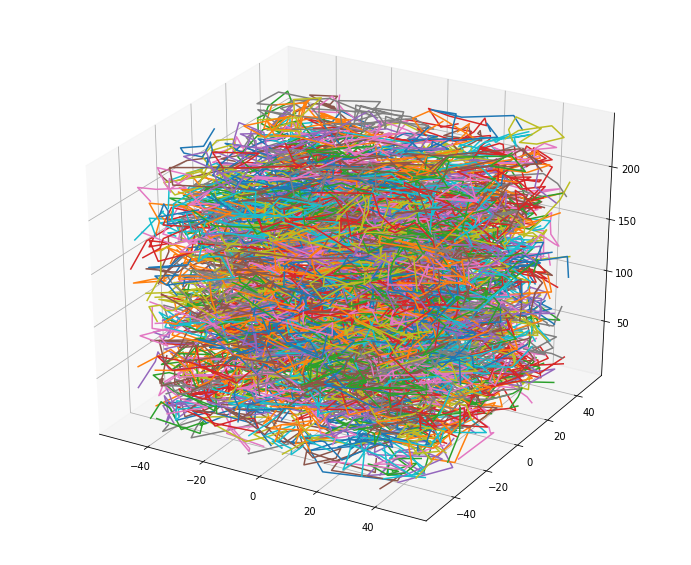

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

begin=0
n_tube=len(tubes)-1
for tube in tubes[begin:begin+n_tube]:
    ax.plot(tube.x[:,0], tube.x[:,2], tube.x[:,1])